This notebook explains the TDA features.

### Data
* 62 ROIs in `TMA PSRH LUAD - Threshold images (230)` 
* Components studied: ECM, cancer cells, leukocytes

### 1st level features: topological features - persistence diagrams (PD)
* These are the first output of a standard TDA method.
* Given an ROI and a component (ECM, cancer, leukocytes), we generate two TDA features, namely, PD0 and PD1.
    * PD0: dimension-0 persistence diagram.  
    * PD1: dimension-1 persistence diagram. 
* Given an ROI and a pair of components (ECM, cancer, leukocytes), we generate two Dowker TDA features. These are labeled DPD0 and DPD1.
    * DPD0: dimension-0 Dowker persistence diagram.
    * DPD1: dimension-1 Dowker persistence diagram. 
* Each persistence diagram is a collection of points on a line (PD0) or a plane (PD1, DPD0, DPD1). 
* There are 12 total persistence diagrams:
    * ECM PD0, PD1
    * cancer PD0, PD1
    * leukocytes PD0, PD1
    * (ECM, cancer) DPD0, DPD1,
    * (ECM, leukocytes) DPD0, DPD1,
    * (cancer, leukocytes) DPD0, DPD1. 

### 2nd level features: topological features - persistence images (PI)
* Each persistence diagram is converted to a persistence image (PI), which sumamrizes the distribution of points in the persistence diagram via an image. 
    * PI0: dimension-0 persistence image. Computed from PD0. Vector of length 20
    * PI1: dimension-1 persistence image. Computed from PD1. Array of size 20 x 20.
    * DPI0: dimension-0 Dowker persistence image. Computed from DPD0. Array of size 20 x 20.
    * DPI1: dimension-1 Dowker persistence image. Computed from DPD1. Array of size 20 x 20.
* There are 12 total persistence images, one from each PD listed above.

### 3nd level features 
* These are probably the most useful features to analyze.
* From the topological features (1st and 2nd level), we extract the following features:
    1. UMAP coordinates (2-dimensional)
        * This is computed from the persistence images (PI).
        * Any persistence image that is an array of size 20 x 20 is first flattened to a vector of length 400. 
    2. PCA coordinates (2-dimensional)
        * This is computed from the persistence images (PI).
        * Any persistence image that is an array of size 20 x 20 is first flattened to a vector of length 400. 
    3.  Entropy (1-dimensional)
        * This is computed from the persistence diagrams (PD). Entropy (randomness) of points in a persistence diagram.
    4. number of points (1-dimensional)
        * This is computed from the persistence diagrams (PD). Number of points in a persistence diagram. 

* The 3rd level features are saved in `features/`
    * note that each feature (for all ROIs) are saved in a csv format. The first column of the CSV indicates the ROIs. Note that the row index of different csv files are not necessarily the same. (That is, row 1 in one CSV file and row 1 in another CSV file are not necessarily the same ROI.) One needs to check that the ROIs match up before merging dataframes / CSV files.
    * Note that the number of rows of CSV files may also vary. This is because I removed any ROI that had an empty persistence diagram. 
    * The 3rd (Entropy) and 4th (number of points) features are saved in one CSV file.
    * The very bottom cell shows how you load the CSV file that contains ALL features. Corresponds to `features/all_features.csv` 

In [2]:
import h5py
import csv
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def plot_PD(barcode, 
             lw = 10,
             color = "slategrey",
             ax = None,
             highlight = None,
             title = "",
             titlefontsize = 12,
             alpha = 0.5,
             pd_min = None,
             pd_max = None,
             tickfontsize = 9,
             threshold_lw = 3,
             diagonal_lw = 1,
             *args,
             **kwargs):
    """plots PD"""
    
    m = np.nanmax(barcode[barcode != np.inf])
    ax = ax or plt.gca()
            
    ax.set_aspect('equal', 'box')
    if pd_max == None:
        ax.set_xlim((0, m * 1.1))
        ax.set_ylim((0, m * 1.1))
        ax.plot([0, m * 1.1], [0, m * 1.1], c = "black", linewidth = diagonal_lw, zorder = 1)
        
        
    else:
        ax.set_xlim((pd_min, pd_max))
        ax.set_ylim((pd_min, pd_max))
        ax.plot([0, pd_max], [0, pd_max], c = "black", linewidth = diagonal_lw, zorder = 1)
        
        
    ax.scatter(barcode[:,0], barcode[:,1], c = color, alpha = alpha, *args, **kwargs, zorder = 2)
        # if "highlight" is provided, color the selected points in specific colors
    if highlight != None:
        for (p_color, point) in highlight.items():
            ax.scatter(barcode[point, 0], barcode[point, 1], c = p_color, *args, **kwargs, zorder = 2)
    ax.tick_params(labelsize=tickfontsize)
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    ax.set_title(title, fontsize = titlefontsize)

    return ax
    

# Visualize example persistence diagram (PD), persistence image (PI) from ECM

In [4]:
# These are parameters for plotting ECM PD and PI.
max0 = 1309.1378842581862
max1 = 1945.0

PI0_xmin = 0.0
PI0_xmax = 0.0
PI0_ymin = 0.0
PI0_ymax = 1440.0516726840049
PI1_xmin = -155.62900510779394
PI1_xmax = 1822.5535896732479
PI1_ymin = 0.0
PI1_ymax = 834.2364675664435

In [5]:
# specify ROI
ROI_name = "CRUK0037_R5_ROI_2"

# load PD
PD0 = np.genfromtxt("ECM_PD/PD0/" + ROI_name + ".csv", delimiter = ",")
PD1 = np.genfromtxt("ECM_PD/PD1/" + ROI_name + ".csv", delimiter = ",")

# load PI
PI0 = np.genfromtxt("ECM_PD/PI0/" + ROI_name + ".csv", delimiter = ",")
PI1 = np.genfromtxt("ECM_PD/PI1/" + ROI_name + ".csv", delimiter = ",")


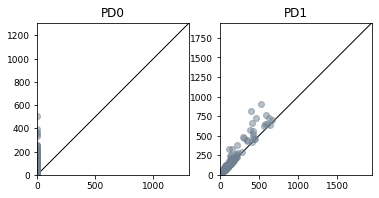

In [6]:
# plot persistence diagram in dimension 0
fig, ax = plt.subplots(ncols = 2)
plot_PD(PD0, ax = ax[0], title = "PD0", pd_max = max0)
plot_PD(PD1, ax = ax[1], title = "PD1", pd_max = max1)
plt.show()


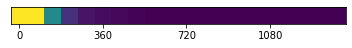

In [7]:
# plot persistence image in dimension 0
plt.imshow(PI0.reshape(-1, 20))
xtickvalues = [int(x) for x in np.arange(PI0_ymin, PI0_ymax, step = (PI0_ymax - PI0_ymin) / 4)]
plt.xticks(np.arange(0, 20, step = 5), xtickvalues)
plt.yticks([])
plt.show()

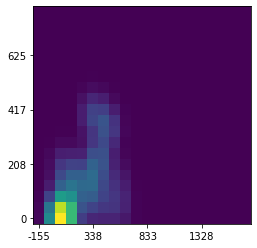

In [8]:
# plot persistence image in dimension 1
fig, ax = plt.subplots()
ax.imshow(PI1)

# plt.imshow(PI1)
xtickvalues = [int(x) for x in np.arange(PI1_xmin, PI1_xmax, step = (PI1_xmax - PI1_xmin) / 4)]
ytickvalues = [int(x) for x in np.arange(PI1_ymin, PI1_ymax, step = (PI1_ymax - PI1_ymin) / 4)]
plt.xticks(np.arange(0, 20, step = 5), xtickvalues)
plt.yticks(np.arange(0, 20, step = 5), ytickvalues)
plt.gca().invert_yaxis()
plt.show()

# 3rd level features 
Load dataframes containing the 3rd level features 
* UMAP (1st and 2nd coordinates)
* PCA (1st and 2nd coordinates)
* entropy - one number, between 0 and 1
* number of points - one number, >= 0

In [9]:
### From ECM 
# UMAP coordinates 
df_ECM0_umap = pd.read_csv("features/ECM_dim0_umap.csv")
df_ECM1_umap = pd.read_csv("features/ECM_dim1_umap.csv")

# PCA coordinates 
df_ECM0_PCA = pd.read_csv("features/ECM_dim0_PCA.csv")
df_ECM1_PCA = pd.read_csv("features/ECM_dim1_PCA.csv")

# entropy & number of points
df_ECM0_entropy_npoints = pd.read_csv("features/ECM_dim0_entropy_npoints.csv")
df_ECM1_entropy_npoints = pd.read_csv("features/ECM_dim1_entropy_npoints.csv")


### From cancer
# UMAP coordinates
df_cancer0_umap = pd.read_csv("features/cancer_dim0_umap.csv")
df_cancer1_umap = pd.read_csv("features/cancer_dim1_umap.csv")

# PCA coordinates 
df_cancer0_PCA = pd.read_csv("features/cancer_dim0_PCA.csv")
df_cancer1_PCA = pd.read_csv("features/cancer_dim1_PCA.csv")

# entropy & number of points
df_cancer0_entropy_npoints = pd.read_csv("features/cancer_dim0_entropy_npoints.csv")
df_cancer1_entropy_npoints = pd.read_csv("features/cancer_dim1_entropy_npoints.csv")


### From leukocytes
# UMAP coordinates 
df_leukocytes0_umap = pd.read_csv("features/leukocytes_dim0_umap.csv")
df_leukocytes1_umap = pd.read_csv("features/leukocytes_dim1_umap.csv")

# PCA coordinates 
df_leukocytes0_PCA = pd.read_csv("features/leukocytes_dim0_PCA.csv")
df_leukocytes1_PCA = pd.read_csv("features/leukocytes_dim1_PCA.csv")

# entropy & number of points
df_leukocytes0_entropy_npoints = pd.read_csv("features/leukocytes_dim0_entropy_npoints.csv")
df_leukocytes1_entropy_npoints = pd.read_csv("features/leukocytes_dim1_entropy_npoints.csv")


### From (ECM, cancer)
# UMAP coordinates 
df_ECM_cancer0_umap = pd.read_csv("features/ECM_cancer_dim0_umap.csv")
df_ECM_cancer1_umap = pd.read_csv("features/ECM_cancer_dim1_umap.csv")

# PCA coordinates 
df_ECM_cancer0_PCA = pd.read_csv("features/ECM_cancer_dim0_PCA.csv")
df_ECM_cancer1_PCA = pd.read_csv("features/ECM_cancer_dim1_PCA.csv")

# entropy & number of points
df_ECM_cancer0_entropy_npoints = pd.read_csv("features/ECM_cancer_dim0_entropy_npoints.csv")
df_ECM_cancer1_entropy_npoints = pd.read_csv("features/ECM_cancer_dim1_entropy_npoints.csv")


### From (ECM, leukocytes)
# UMAP coordinates 
df_ECM_leukocytes0_umap = pd.read_csv("features/ECM_leukocytes_dim0_umap.csv")
df_ECM_leukocytes1_umap = pd.read_csv("features/ECM_leukocytes_dim1_umap.csv")

# PCA coordinates 
df_ECM_leukocytes0_PCA = pd.read_csv("features/ECM_leukocytes_dim0_PCA.csv")
df_ECM_leukocytes1_PCA = pd.read_csv("features/ECM_leukocytes_dim1_PCA.csv")

# entropy & number of points
df_ECM_leukocytes0_entropy_npoints = pd.read_csv("features/ECM_leukocytes_dim0_entropy_npoints.csv")
df_ECM_leukocytes1_entropy_npoints = pd.read_csv("features/ECM_leukocytes_dim1_entropy_npoints.csv")


### From (cancer, leukocytes)
# UMAP coordinates 
df_cancer_leukocytes0_umap = pd.read_csv("features/cancer_leukocytes_dim0_umap.csv")
df_cancer_leukocytes1_umap = pd.read_csv("features/cancer_leukocytes_dim1_umap.csv")

# PCA coordinates 
df_cancer_leukocytes0_PCA = pd.read_csv("features/cancer_leukocytes_dim0_PCA.csv")
df_cancer_leukocytes1_PCA = pd.read_csv("features/cancer_leukocytes_dim1_PCA.csv")

# entropy & number of points
df_cancer_leukocytes0_entropy_npoints = pd.read_csv("features/cancer_leukocytes_dim0_entropy_npoints.csv")
df_cancer_leukocytes1_entropy_npoints = pd.read_csv("features/cancer_leukocytes_dim1_entropy_npoints.csv")


### UMAP & PCA from combined PI (from all components, all dimensions) features
df_combined_umap = pd.read_csv("features/combined_umap.csv")
df_combined_PCA = pd.read_csv("features/combined_PCA.csv");

To load one dataframe that is a merged version of all dataframes above: 

In [10]:
df_merged = pd.read_csv("features/all_features.csv", index_col =0)

* Note that there are some rows with NaN
* This occurs in either of the two settings:
    1. There were a few ROIs for which we had cell location information, but not the ECM. For such ROIs, any ECM-related features will be NaN.
    2. For ROIs that have all ECM and cell location information, if a particular persistence diagram was empty, then any 3rd level features computed from persistence diagrams will appear as NaN.